In [18]:
#tableau dashbord для той же таблице по ссылке:https://public.tableau.com/views/Revenue_16787477220380/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link

import matplotlib.pyplot as plt
import pandas as pd
import pyodbc
from datetime import date
import calendar

In [2]:
#connection to SQL
cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER=LAPTOP-UH7H0R6V;DATABASE=bike_stores;Trusted_Connection=yes')

In [3]:
view = pd.read_sql('SELECT * FROM sales.results', cnxn)   #reading view

In [4]:
view['order_date'] = pd.to_datetime(view['order_date'], yearfirst=True)

#создание колонок для года и месяца
view['year'] = view['order_date'].apply(lambda x: x.year)  
view['month'] = view['order_date'].apply(lambda x: x.month)

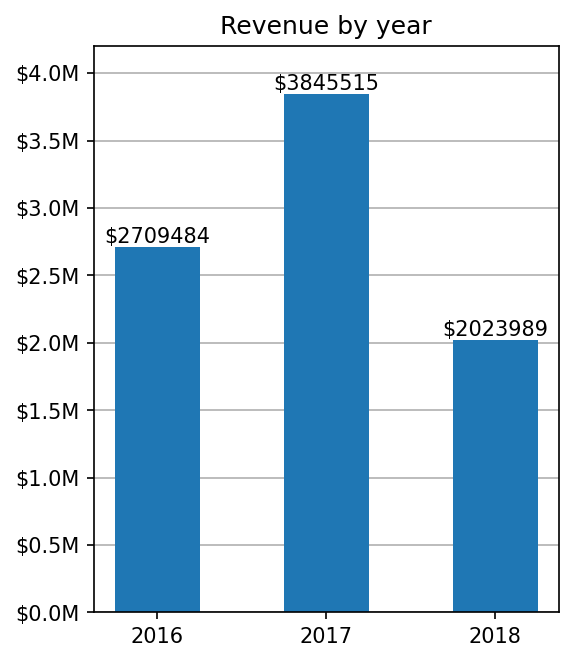

In [28]:
#plt.style.use('tableau-colorblind10')

#yearly revenue plot

#значения для осей
years = view['year'].unique()
yearsum = view.groupby('year').sum().revenue

fig_yr, ax_yr = plt.subplots(figsize=(4, 5), dpi=150)

p = ax_yr.bar(years, yearsum, width = 0.5, tick_label= list(map(str, years)))    
ax_yr.bar_label(p, fmt = '$%.f')
ax_yr.yaxis.set_major_formatter(lambda y, pos: f'${y*1e-6:1.1f}M')  #формат оси у
ax_yr.set_ybound(0, 4.2e6)

ax_yr.grid(axis='y')
ax_yr.set_axisbelow(True)
ax_yr.set_title('Revenue by year')

plt.savefig("figures/yearly_revenue.png", bbox_inches='tight')

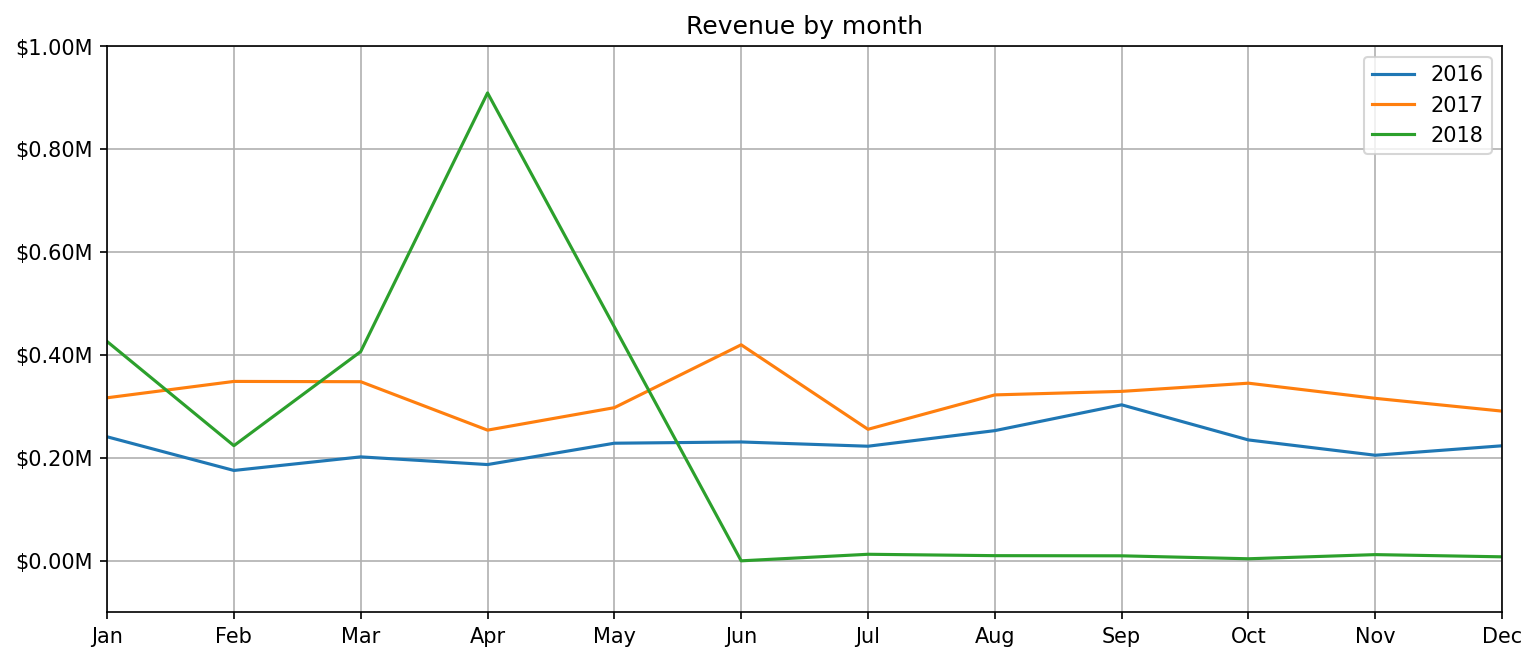

In [27]:
#monthly revenue

fig_mr, ax_mr = plt.subplots(figsize = (12, 5),dpi=150)

#значения для осей
monthsum = view.groupby(['year', 'month']).sum().revenue
months = list(range(1, 13))

for year in years:
    ax_mr.plot(monthsum[year].index.tolist(), monthsum[year], label = str(year))

ax_mr.set_ybound(-1e5, 1e6)
ax_mr.set_xbound(1, 12)
ax_mr.set_xticks(months)
ax_mr.set_xticklabels([calendar.month_abbr[int(x)] for x in months]) #число месяца в строку
ax_mr.yaxis.set_major_formatter(lambda y, pos: f'${y*1e-6:1.2f}M')   #формат оси у

ax_mr.set_title('Revenue by month')
ax_mr.grid()
ax_mr.legend()

plt.savefig("figures/monthly_revenue.png", bbox_inches='tight')

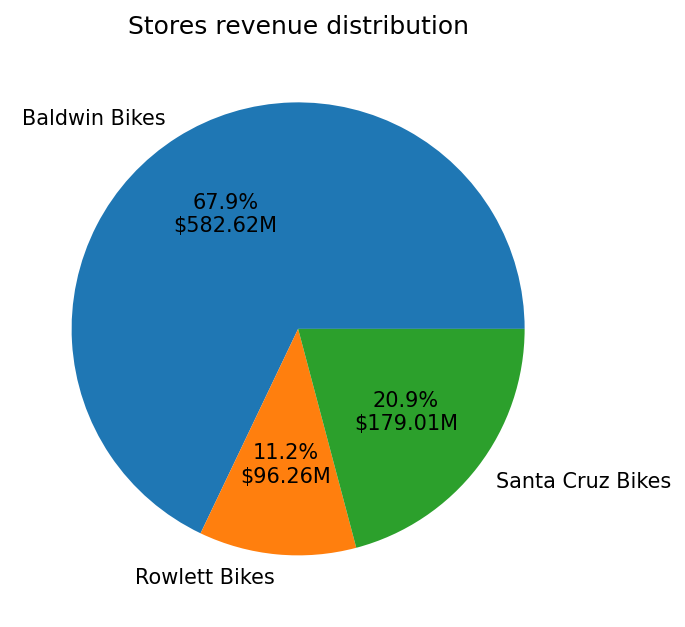

In [26]:
#pie chart

store_pie = view.groupby('store_name').sum().revenue
total_revenue = view.revenue.sum()

percentage = lambda x: f'{x:.1f}%\n${x*1e-6*total_revenue:1.2f}M' #значения кусков

fig_pie, ax_pie = plt.subplots(figsize=(6, 5), dpi=150)

ax_pie.pie(store_pie, labels = store_pie.index, autopct = percentage)

ax_pie.set_title('Stores revenue distribution')

plt.savefig("figures/stores_pie.png", bbox_inches='tight')

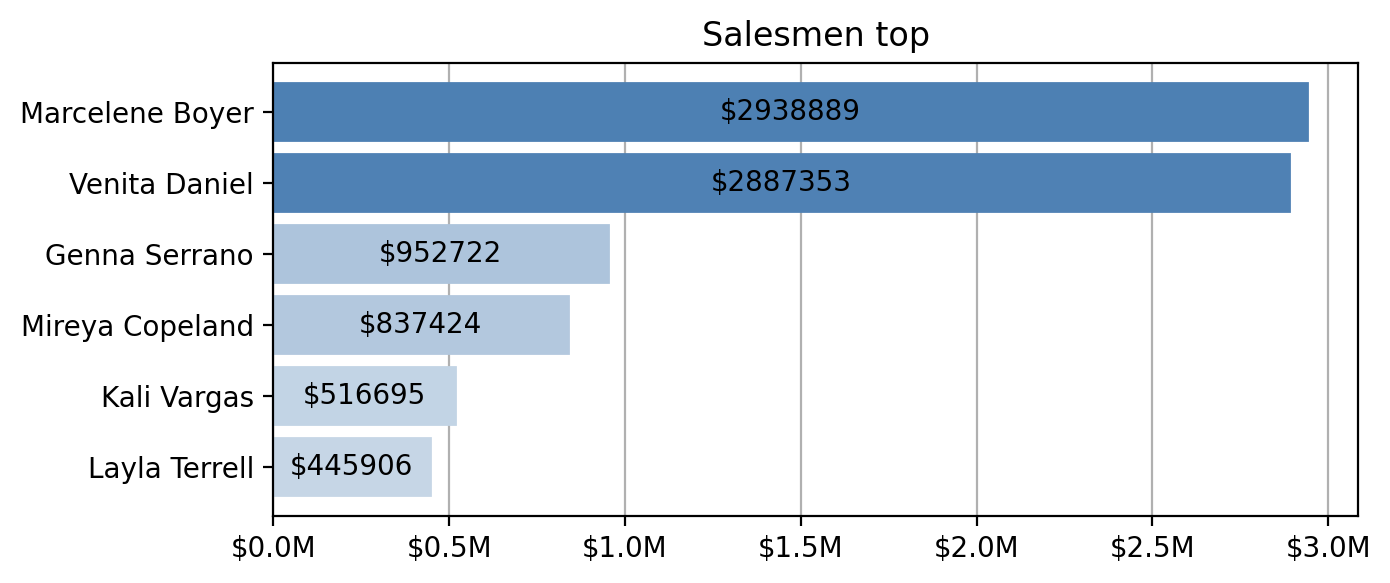

In [25]:
# top salesmen chart

salesmen = view.groupby('sales_rep').sum().revenue.sort_values()

fig_sm, ax_sm = plt.subplots(figsize = (7, 3), dpi=200)
y_positions = list(range(len(salesmen)))

bar_rgb = (.3, .5, .7) #цвет

hbars = ax_sm.barh(y_positions, salesmen, color = bar_rgb)

#градиент цветов
for bar in hbars:
    value = (1 - bar.get_width() / hbars[-1].get_width())*0.8
    new_rgb = [(1-x)*value + x for x in bar_rgb]
    bar.set(color = new_rgb)

ax_sm.yaxis.set_ticks(y_positions)
ax_sm.yaxis.set_major_formatter(lambda y, pos: salesmen.index[int(y)])
ax_sm.xaxis.set_major_formatter(lambda x, pos: f'${x*1e-6:1.1f}M')
ax_sm.bar_label(hbars, fmt = '$%.f', label_type = 'center')

ax_sm.grid(axis='x')
ax_sm.set_axisbelow(True)
ax_sm.set_title('Salesmen top')

plt.savefig("figures/salesmen.png", bbox_inches='tight')
